In [7]:
library(ggplot2)
library(readr)
library(dplyr)
library(lubridate)
library(tidyr)
library(readxl)

In [6]:
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rematch’, ‘cellranger’, ‘progress’




In [10]:
system("git -C ../COVID-19/ pull")

In [32]:
system("wget https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx")

In [24]:
census_xl <- readxl::read_xlsx('./nst-est2019-01.xlsx', skip = 3)

New names:
* `` -> ...1



In [36]:
census_xl %>% head()

...1,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
United States,308745538,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
Northeast,55317240,55318443,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803
Midwest,66927001,66929725,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004
South,114555744,114563030,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448
West,71945553,71946907,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268
.Alabama,4779736,4780125,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185


In [37]:
census_xl %>%
select(1, "2019") %>% 
head()

...1,2019
<chr>,<dbl>
United States,328239523
Northeast,55982803
Midwest,68329004
South,125580448
West,78347268
.Alabama,4903185


In [50]:
# census_df <- 
census_xl %>%
transmute(region = `...1` %>% stringr::str_replace("\\.", ""),
          pop=`2019`) %>%
filter(!is.na(pop)) %>%
mutate(region = ifelse(region %in% state.name, 
                          setNames(state.abb, state.name)[region],
                          region),
          pop)

region,pop
<chr>,<dbl>
United States,328239523
Northeast,55982803
Midwest,68329004
South,125580448
West,78347268
AL,4903185
AK,731545
AZ,7278717
AR,3017804


In [34]:
deaths <- readr::read_csv('../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
confirmed <- readr::read_csv('../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
recovered <- readr::read_csv('../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.



In [160]:
'Utah' %in% state.name

[1] TRUE

ERROR: Error in eval(expr, envir, enclos): object 'state' not found


In [169]:
setNames(state.abb, state.name)

Alabama         Alaska        Arizona       Arkansas     California 
          "AL"           "AK"           "AZ"           "AR"           "CA" 
      Colorado    Connecticut       Delaware        Florida        Georgia 
          "CO"           "CT"           "DE"           "FL"           "GA" 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
          "HI"           "ID"           "IL"           "IN"           "IA" 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
          "KS"           "KY"           "LA"           "ME"           "MD" 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
          "MA"           "MI"           "MN"           "MS"           "MO" 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
          "MT"           "NE"           "NV"           "NH"           "NJ" 
    New Mexico       New York North Carolina   North Dakota           Ohio 
          "NM"           "NY"           "NC"           "ND"           "OH" 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
          "OK"           "OR"           "PA"           "RI"           "SC" 
  South Dakota      Tennessee          Texas           Utah        Vermont 
          "SD"           "TN"           "TX"           "UT"           "VT" 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
          "VA"           "WA"           "WV"           "WI"           "WY"

In [180]:
melter <- function(df, var_name){
    df %>%
#     dplyr::select(-Lat, -Long) %>%
rename(region=`Country/Region`, province =`Province/State`) %>%
reshape2::melt(id.vars=c("region", "province", "Lat", "Long")) %>%    
tidyr::separate(col = province, into = c("city", "province"), sep = ",") %>% 
mutate(
    province = ifelse(is.na(province), city, province),
    province = trimws(ifelse(province %in% state.name, 
                      setNames(state.abb, state.name)[province],
                      province))
) %>%
transmute(
    region,
    province,
    city,
    lat=Lat,
    long=Long,
    ymd=mdy(variable),    
    value
) %>%
    rename_(.dots = setNames("value", var_name))
    
    
} 

In [181]:
deaths_df <- melter(deaths, "deaths")
recovered_df <- melter(recovered, "recovered")
confirmed_df <- melter(confirmed, "confirmed")

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 8040 rows [6, 7, 8, 9, 20, 23, 50, 62, 72, 93, 94, 95, 99, 100, 101, 102, 103, 104, 105, 106, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 8040 rows [6, 7, 8, 9, 20, 23, 50, 62, 72, 93, 94, 95, 99, 100, 101, 102, 103, 104, 105, 106, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 8040 rows [6, 7, 8, 9, 20, 23, 50, 62, 72, 93, 94, 95, 99, 100, 101, 102, 103, 104, 105, 106, ...].”


In [182]:
combined_df <- deaths_df %>%
left_join(recovered_df) %>%
left_join(confirmed_df)

Joining, by = c("region", "province", "city", "lat", "long", "ymd")

Joining, by = c("region", "province", "city", "lat", "long", "ymd")



In [183]:
combined_df %>% sample_n(10)

region,province,city,lat,long,ymd,deaths,recovered,confirmed
<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>
Canada,Alberta,Alberta,53.9333,-116.5765,2020-03-17,0,0,74
US,CT,Litchfield,41.7866,-73.2765,2020-01-25,0,0,0
US,MN,Carver County,44.8254,-93.7842,2020-02-20,0,0,0
US,SD,Charles Mix,43.0985,-98.3965,2020-02-21,0,0,0
Kuwait,NA,NA,29.5000,47.7500,2020-02-18,0,0,0
US,Diamond Princess,Diamond Princess,35.4437,139.6380,2020-03-08,0,0,45
"Gambia, The",NA,NA,13.4432,-15.3101,2020-02-09,0,0,0
US,FL,Volusia County,29.0280,-81.0755,2020-02-22,0,0,0
US,WA,Snohomish County,48.0330,-121.8339,2020-02-03,0,0,0


In [184]:
options(repr.plot.width = 20, repr.plot.height = 8)

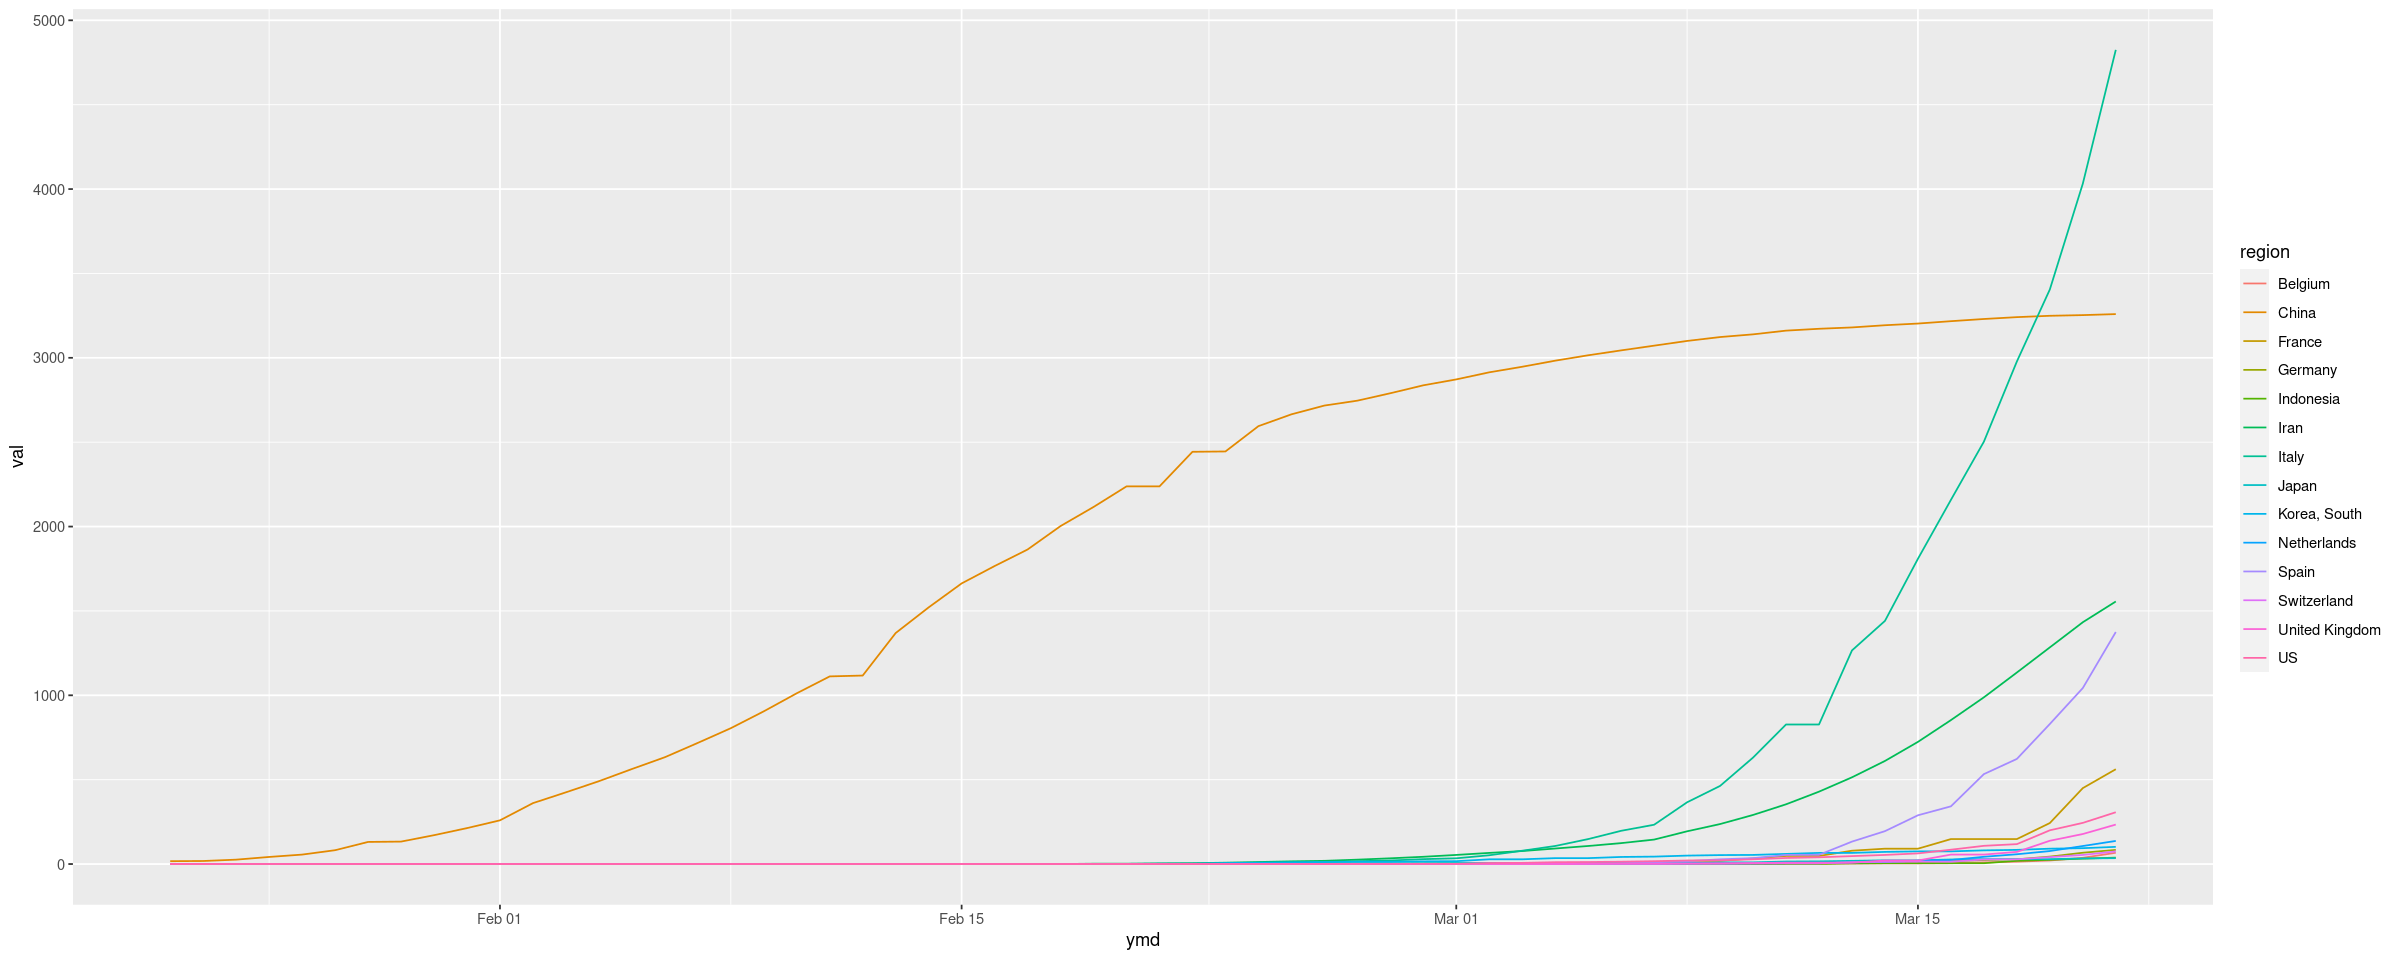

In [185]:
combined_df %>%
group_by(region, ymd) %>%
summarise(
    val = sum(deaths, na.rm = T)
) %>%
group_by(region) %>%
mutate(max_val= max(val)) %>%
ungroup() %>%
arrange(desc(max_val)) %>%
mutate(rank= dense_rank(desc(max_val)))%>%
filter(rank < 15) %>%
ggplot(aes(x=ymd, y= val, color=region)) +
geom_line()

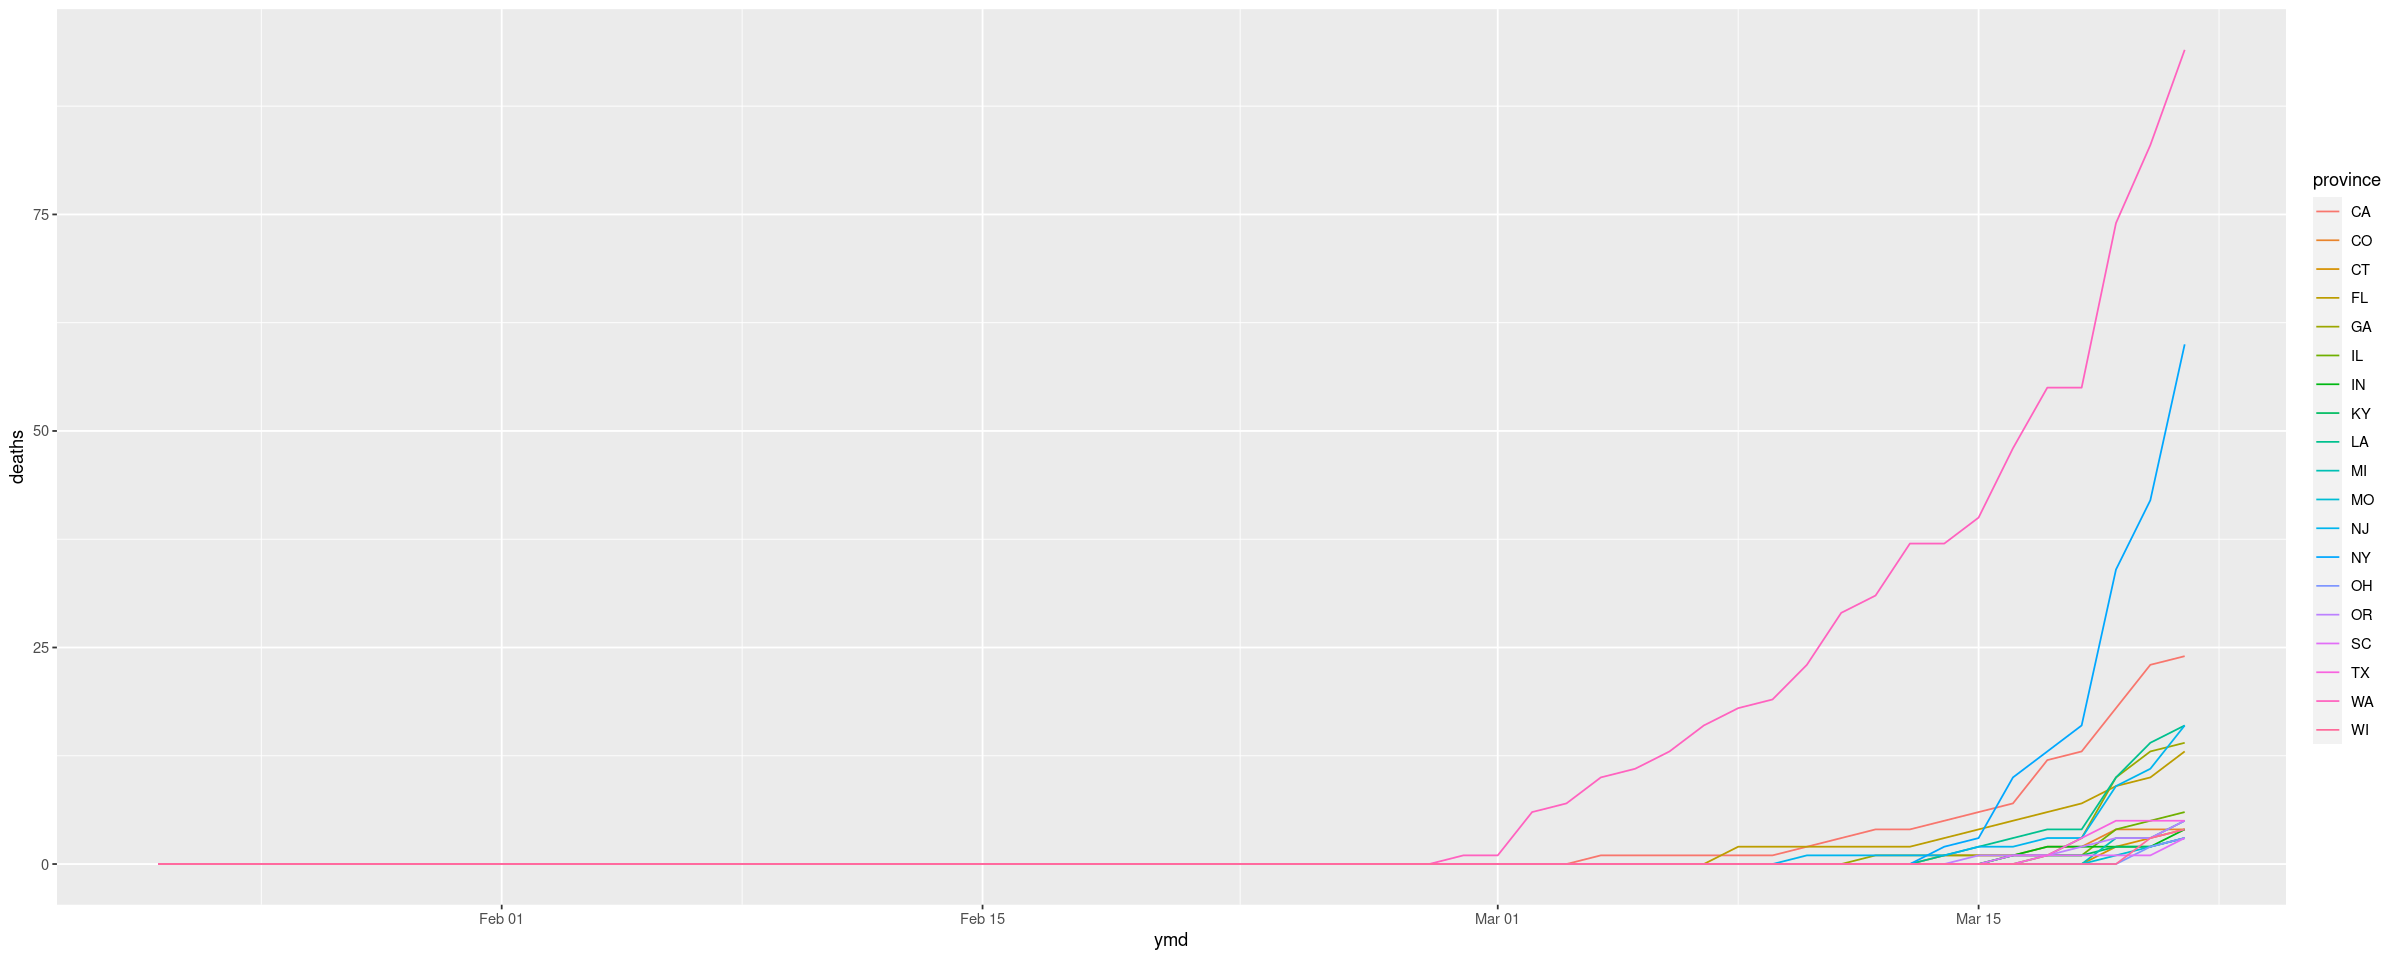

In [186]:
combined_df %>%
filter(region== "US") %>%
# tidyr::separate(col = province, into = c("city", "state"), sep = ",") %>%
group_by(province, ymd) %>%
summarise(deaths = sum(deaths)) %>%
group_by(province) %>%
mutate(max_val= max(deaths)) %>%
ungroup() %>%
arrange(desc(max_val)) %>%
mutate(rank= dense_rank(desc(max_val)))%>%
filter(rank < 15) %>%
filter(max_val >2) %>%
ggplot(aes(x=ymd, y= deaths, color=province)) +
geom_line()

In [188]:
combined_df %>%
filter(region== "US") %>%
filter(province=="UT") %>%
tail()
# tidyr::separate(col = province, into = c("city", "state"), sep = ",") %>%
group_by(province, ymd) %>%
summarise(deaths = sum(deaths)) %>%
group_by(province) %>%
mutate(max_val= max(deaths)) %>%
ungroup() %>%
arrange(desc(max_val)) %>%
mutate(rank= dense_rank(desc(max_val)))%>%
filter(rank < 15) %>%
filter(max_val >2) %>%
ggplot(aes(x=ymd, y= deaths, color=province)) +
geom_line()

,region,province,city,lat,long,ymd,deaths,recovered,confirmed
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>
235,US,UT,Davis County,40.9629,-112.0953,2020-03-20,0,0,0
236,US,UT,Summit,40.8298,-110.9984,2020-03-20,0,0,0
237,US,UT,Utah,40.1500,-111.8624,2020-03-21,0,0,136
238,US,UT,Weber,41.2603,-111.9522,2020-03-21,0,0,0
239,US,UT,Davis County,40.9629,-112.0953,2020-03-21,0,0,0
240,US,UT,Summit,40.8298,-110.9984,2020-03-21,0,0,0


ERROR: Error in group_by(province, ymd): object 'province' not found


[1] "AL" "AK" "AZ" "AR" "CA" "CO" "CT" "DE" "FL" "GA" "HI" "ID" "IL" "IN" "IA"
[16] "KS" "KY" "LA" "ME" "MD" "MA" "MI" "MN" "MS" "MO" "MT" "NE" "NV" "NH" "NJ"
[31] "NM" "NY" "NC" "ND" "OH" "OK" "OR" "PA" "RI" "SC" "SD" "TN" "TX" "UT" "VT"
[46] "VA" "WA" "WV" "WI" "WY"